In [38]:
import pandas as pd

In [39]:
df=pd.read_csv("/content/Corona_NLP_train.csv",encoding="Latin-1")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [40]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [41]:

df = df.drop("Location",axis='columns')
df = df.drop("TweetAt",axis='columns')

In [43]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [42]:
df = df.drop("ScreenName",axis='columns')
df = df.drop("UserName",axis='columns')

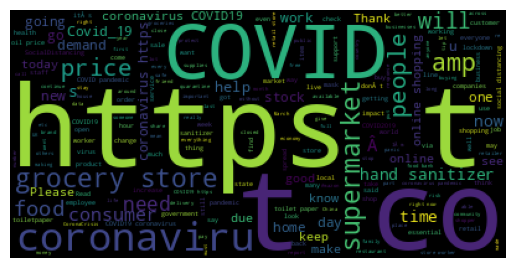

In [ ]:
# @title Most common words in positive tweets

import matplotlib.pyplot as plt
positive_tweets = df[df['Sentiment'] == 'Positive']['OriginalTweet']
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(positive_tweets))
plt.imshow(wordcloud)
_ = plt.axis('off')

In [44]:
for i in range(5):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P





#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j




#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n


In [45]:
# prompt: use df and write code to eliminate all non-alphanumeric data from column name 'OriginalTweet'

import re

df['cleanOriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', '', x))


In [46]:
df.head()

,OriginalTweet,Sentiment,cleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


In [47]:
for i in range(3):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [48]:
for i in range(3):
  print(df['cleanOriginalTweet'][i])

MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa and httpstcoxX6ghGFzCC and httpstcoI2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia Woolworths to give elderly disabled dedicated shopping hours amid COVID19 outbreak httpstcobInCA9Vp8P


In [49]:
df.head()

,OriginalTweet,Sentiment,cleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


In [50]:
# prompt: Using dataframe df: we need to remove stops word cleanOriginalTweet

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['cleanOriginalTweet'] = df['cleanOriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
df.head()

,OriginalTweet,Sentiment,cleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...
1,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,My food stock one emptyPLEASE dont panic THERE...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready go supermarket COVID19 outbreakNot Im...


In [52]:
for i in range(3):
  print(df['cleanOriginalTweet'][i])

MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa httpstcoxX6ghGFzCC httpstcoI2NlzdxNo8
advice Talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist GP set online shopping accounts poss adequate supplies regular meds order
Coronavirus Australia Woolworths give elderly disabled dedicated shopping hours amid COVID19 outbreak httpstcobInCA9Vp8P


In [53]:
# prompt: do lematization on cleanOriginalTweet

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['cleanOriginalTweet'] = df['cleanOriginalTweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [54]:
for i in range(3):
  print(df['cleanOriginalTweet'][i])

MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa httpstcoxX6ghGFzCC httpstcoI2NlzdxNo8
advice Talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist GP set online shopping account po adequate supply regular med order
Coronavirus Australia Woolworths give elderly disabled dedicated shopping hour amid COVID19 outbreak httpstcobInCA9Vp8P


In [55]:
# prompt: stemrize on cleanOriginalTweet

from nltk.stem import PorterStemmer

porter = PorterStemmer()

df['cleanOriginalTweet'] = df['cleanOriginalTweet'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))

for i in range(3):
  print(df['cleanOriginalTweet'][i])


menyrbi philgahan chrisitv httpstcoifz9fan2pa httpstcoxx6ghgfzcc httpstcoi2nlzdxno8
advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account po adequ suppli regular med order
coronaviru australia woolworth give elderli disabl dedic shop hour amid covid19 outbreak httpstcobinca9vp8p


In [56]:
# prompt: now apply TFIDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

features = vectorizer.fit_transform(df['cleanOriginalTweet'])

print(features.shape)

(41157, 81596)


In [57]:
df.head()

,OriginalTweet,Sentiment,cleanOriginalTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,my food stock one emptypleas dont panic there ...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me readi go supermarket covid19 outbreaknot im...


In [58]:
# prompt: code for logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import numpy as np

model = LogisticRegression()

X = features
y = df['Sentiment']

model.fit(X, y)

print(model.score(X, y))


0.796219355152222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# prompt: code for accuracy

from sklearn.metrics import accuracy_score
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(accuracy)


0.796219355152222
